In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../src")

from data_preprocessing import (
    DataLoader,
    ComplaintFilter,
    ComplaintEDA,
    NarrativeCleaner
)

sns.set_theme(style="whitegrid")

#### Load Raw CFPB Data

In [2]:
loader = DataLoader("../data/raw/complaints.csv")
df_raw = loader.load_data()

print(f"Total Raw Complaints: {df_raw.shape[0]}")
df_raw.info()

/Users/hazel/Desktop/Self Study/kiam8/rag-complaint-chatbot/notebooks/../src/data_preprocessing.py:19: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(file_path)


Total Raw Complaints: 9609797
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1),

### Initial Product Distribution (EDA)

In [3]:
eda_raw = ComplaintEDA(df_raw)

/var/folders/cm/vngd5r7d2x16wjb2nxg9h5mc0000gn/T/ipykernel_39010/2710673839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


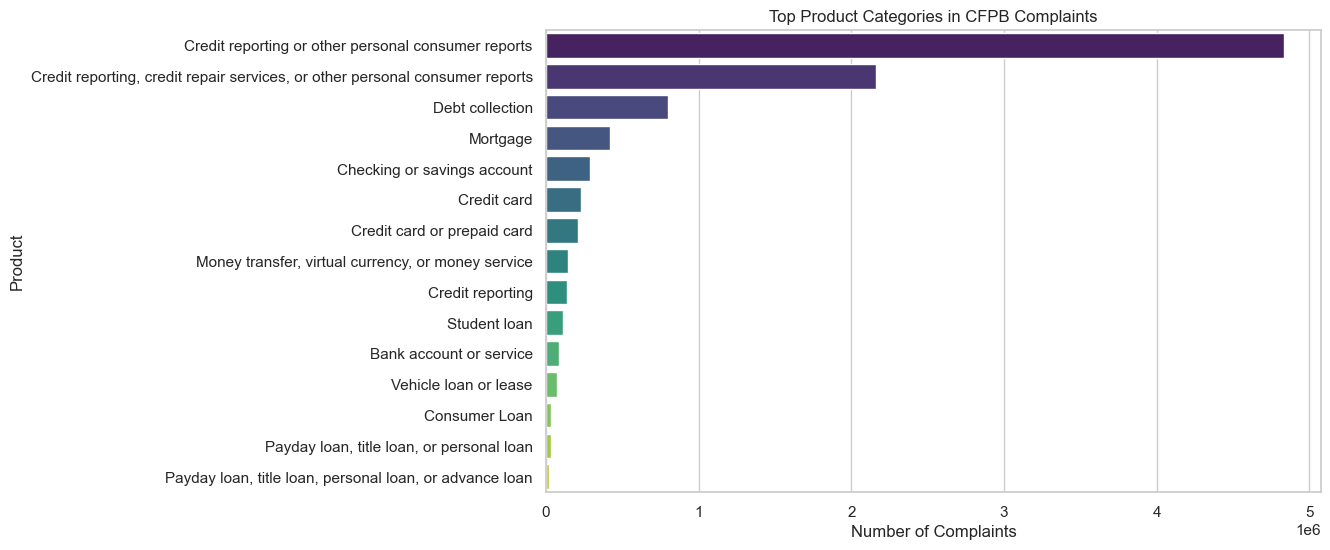

In [4]:
product_counts = df_raw["Product"].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=product_counts.values,
    y=product_counts.index,
    palette="viridis"
)
plt.title("Top Product Categories in CFPB Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.show()

### Filter to CrediTrust Product Scope

In [5]:
filterer = ComplaintFilter(df_raw)

df_filtered = filterer.filter_products()
df_filtered = filterer.remove_missing_narratives()

print(f"Filtered complaints: {df_filtered.shape[0]}")

Filtered complaints: 475879


### Complaint Distribution by Product

In [6]:
eda_filtered = ComplaintEDA(df_filtered)

product_counts = eda_filtered.product_distribution()
print(product_counts)

product_category
Credit Card        189334
Savings Account    140319
Money Transfer      97188
Personal Loan       49038
Name: count, dtype: int64


/var/folders/cm/vngd5r7d2x16wjb2nxg9h5mc0000gn/T/ipykernel_39010/3309779065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


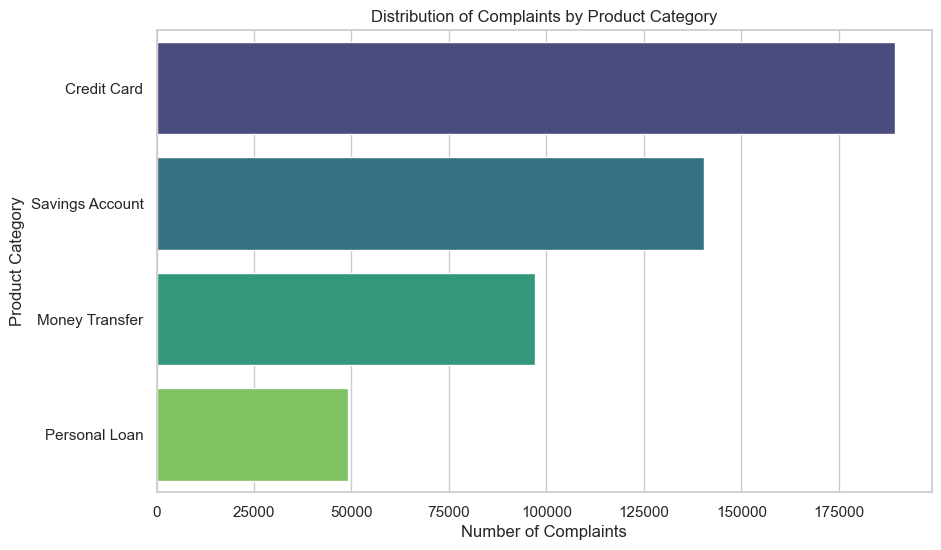

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=product_counts.values,
    y=product_counts.index,
    palette="viridis"
)
plt.title("Distribution of Complaints by Product Category")
plt.xlabel("Number of Complaints")
plt.ylabel("Product Category")
plt.show()


### Narrative Length Analysis

#### Complaints With vs Without Narratives

                    count  percentage
With Narrative     475879       100.0
Without Narrative       0         0.0


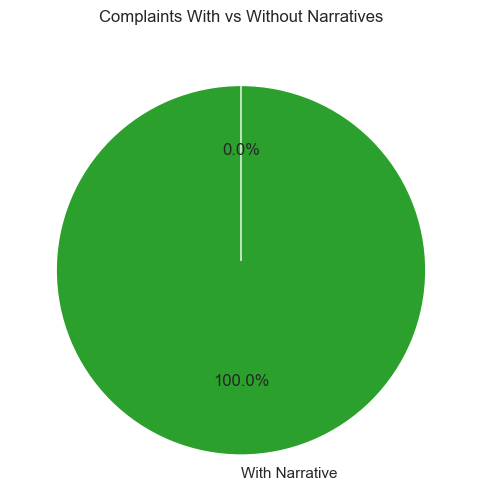

In [ ]:
coverage_df = eda_filtered.narrative_coverage()
print(coverage_df)

# Plot
coverage_df['count'].plot.pie(
    labels=coverage_df.index,          
    autopct="%1.1f%%",                 
    colors=['#2ca02c','#d62728'],      
    startangle=90,                      
    explode=(0.05, 0),                  
    figsize=(6,6)
)

plt.title("Complaints With vs Without Narratives")
plt.ylabel("")  # Remove y-label
plt.show()


There are no complaints without narratives.

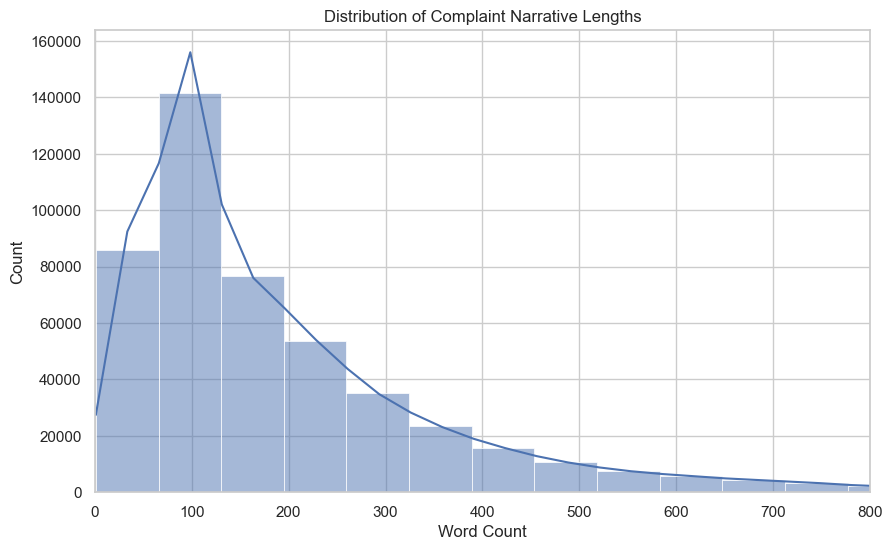

In [9]:
df_filtered['narrative_length'] = df_filtered['Consumer complaint narrative'].apply(
    lambda x: len(str(x).split())
)

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['narrative_length'], bins=100, kde=True)
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Word Count')
plt.xlim(0, 800)
plt.show()

#df_filtered['narrative_length'].describe()



### Clean Complaint Narratives

In [10]:
cleaner = NarrativeCleaner(
    df_filtered,
    text_col="Consumer complaint narrative"
)

df_clean = cleaner.apply()

print("Original:")
print(df_filtered["Consumer complaint narrative"].iloc[0][:200])

print("\nCleaned:")
print(df_clean["cleaned_narrative"].iloc[0][:200])


Original:
A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX  that an account was just opened under my name. I reached out to XXXX XXXX to state that this activity was unaut

Cleaned:
a redacted redacted card was opened under my name by a fraudster i received a notice from redacted that an account was just opened under my name i reached out to redacted redacted to state that this a


### Save Processed Dataset

In [11]:
output_dir = "../data/processed/"

loader.save_data(f"{output_dir}filtered_complaints.csv", df_clean)
print(f"File saved successfully to {output_dir}filtered_complaints.csv")

File saved successfully to ../data/processed/filtered_complaints.csv
